In [10]:
from google.colab import drive
drive.mount('/gdrive')

import os
os.chdir("/gdrive/Shared drives/RocketPy Paper/Conteudo/flightData/Results Filtering RRC3 valetudo/Results Filtering")   

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [17]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.style.use('science')

In [11]:
os.listdir()

["Processing Valetudo's RRC3 Flight Data.ipynb",
 'RRC3_valetudo_remov - RRC3.csv',
 '.ipynb_checkpoints']

In [12]:
flight_data = np.loadtxt("RRC3_valetudo_remov - RRC3.csv", skiprows=1, delimiter=',', usecols=(0,2))

In [13]:
time = flight_data[:, 0]
altitude = flight_data[:, 1]
altitude_hat = savgol_filter(altitude, 51, 3)

In [ ]:
altitude = flight_data[:, 1]

In [32]:
vertical_speed = [0]
for i in range(1, len(time)-1):
    vertical_speed.append((altitude_hat[i+1] - altitude_hat[i-1])/(time[i+1] - time[i-1]))
vertical_speed += [0]

In [34]:
max(vertical_speed)


83.14002333008524

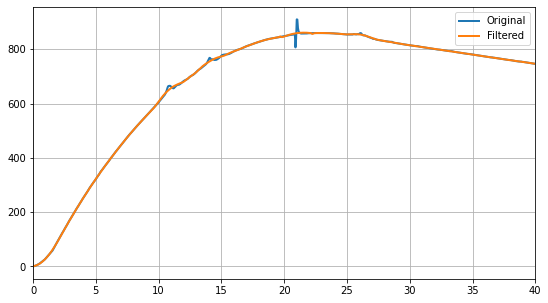

In [36]:
plt.figure(figsize=(9, 5))
plt.plot(time, altitude, label='Original', linewidth=2)
plt.plot(time, altitude_hat, label='Filtered', linewidth=2)
plt.xlim(0, 40)
plt.legend()
plt.grid()
plt.show()

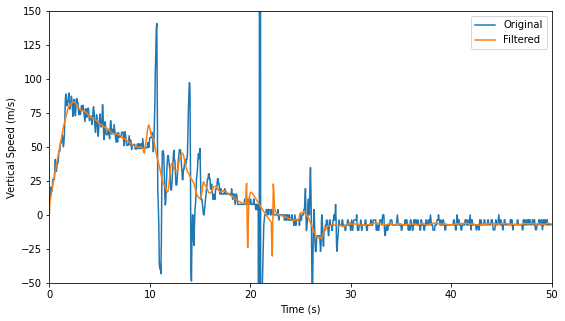

In [30]:
plt.figure(figsize=(9, 5))
plt.plot(time, np.gradient(altitude)/np.diff(time, append=1), label='Original')
plt.plot(time, vertical_speed, label='Filtered')
plt.legend()
plt.ylabel('Vertical Speed (m/s)')
plt.xlabel('Time (s)')
plt.xlim(0, 50)
plt.ylim(-50, 150)
plt.show()

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(time, np.gradient(altitude)/np.diff(time, append=1), label='Original')
plt.plot(time, vertical_speed, label='Filtered')
plt.legend()
plt.ylabel('Vertical Speed (m/s)')
plt.xlabel('Time (s)')
plt.xlim(0, 50)
plt.ylim(-50, 150)
plt.show()

In [20]:
time[np.argmax(vertical_speed)]

2.3

In [21]:
np.max(altitude_hat)

861.1568771885948